`!pip install schemdraw[matplotlib]`

based on <https://schemdraw.readthedocs.io/en/latest/gallery/flowcharting.html>

In [1]:
import schemdraw
from schemdraw import flow

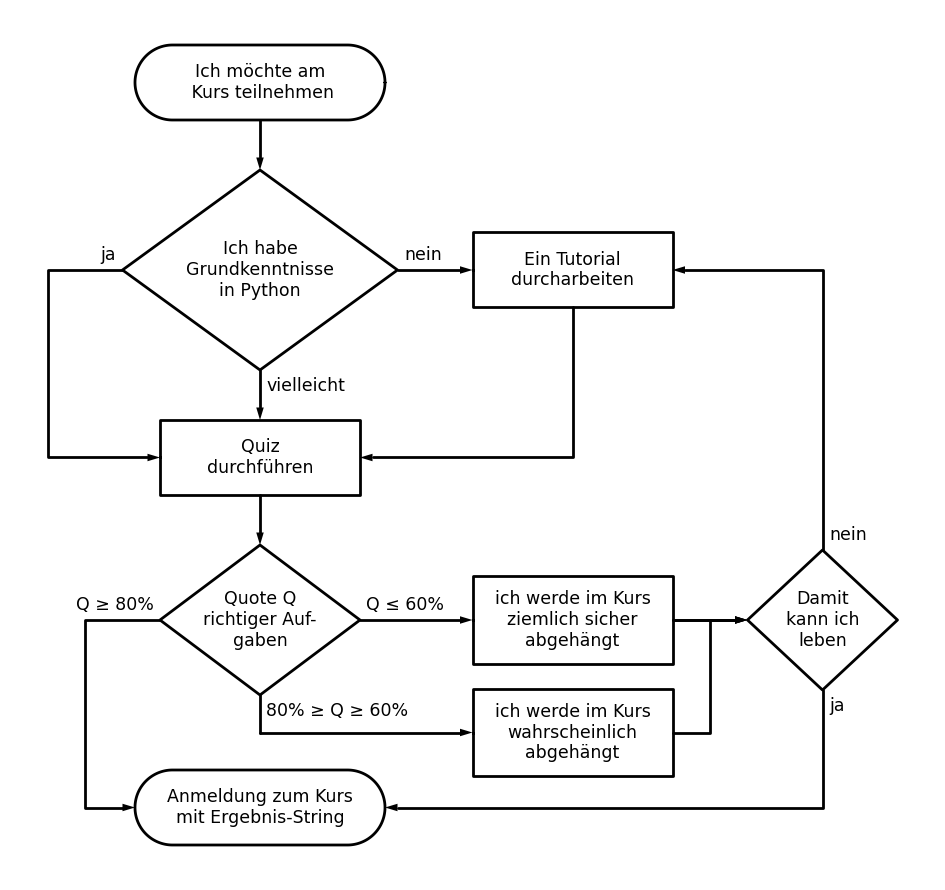

In [2]:
# Hinweis: `:=` ist der Walross-Operator
# (engl. "walrus operator", offiziell "assignment expression", = Zuweisung und Rückgabewert in einem)

with schemdraw.Drawing() as d:
    d += flow.Start(w=5, h=1.5).label('Ich möchte am\n Kurs teilnehmen')
    d += flow.Arrow().down(d.unit/3)
    d += (
        gk := flow.Decision(w=5.5, h=4, W="ja", S='vielleicht', E="nein")
          .label("Ich habe\nGrundkenntnisse\nin Python")
    )
    
    d += flow.Arrow().down(d.unit/3)
    d += (quiz := flow.Box(w=4, h=1.5).label('Quiz\ndurchführen'))
    d += flow.Wire('c', k=-1.5, arrow='->').at(gk.W).to(quiz.W)
    

    d += flow.Arrow().right(d.unit/2).at(gk.E)
    d += (lernen := flow.Box(w=4, h=1.5).anchor('W').label('Ein Tutorial\ndurcharbeiten'))
    d += flow.Wire('|-', k=-1.5, arrow='->').at(lernen.S).to(quiz.E)
    d += flow.Arrow().down(d.unit/3).at(quiz.S)
    d += (
        erfolg := flow.Decision(w=4, h=3, W=r"Q ≥ 80%", S=r"80% ≥ Q ≥ 60%", E="Q ≤ 60%")
          .label("Quote Q\nrichtiger Auf-\ngaben")
    )
    d += flow.Arrow().right(d.unit*.75).at(erfolg.E)
    d += (
        empfehlung1 := flow.Box(w=4, h=1.75).anchor('W')
        .label("ich werde im Kurs\nziemlich sicher\nabgehängt")
    )
    
    d += (
        leiden := flow.Decision(w=3, h=2.8, N="nein", S="ja")
          .label("Damit\nkann ich\nleben")
          .at((empfehlung1.E.x + 1.5, erfolg.W.y))
    )
    
    d += flow.Wire('-',arrow='->').at(empfehlung1.E).to(leiden.W)
    d += flow.Wire('-',arrow='->').at(empfehlung1.E).to(leiden.W)
    d += flow.Line().down(d.unit/4).at(erfolg.S)
    d += flow.Arrow().right().tox(empfehlung1.W)
    d += (
        empfehlung2 := flow.Box(w=4, h=1.75).anchor('W')
        .label("ich werde im Kurs\nwahrscheinlich\nabgehängt")
    )
    d += flow.Wire('z', k=.75, arrow='->').at(empfehlung2.E).to(leiden.W)
    
    d += (
        ende := flow.Terminal(w=5, h=1.5)
        .label("Anmeldung zum Kurs\nmit Ergebnis-String").at((0, erfolg.S.y - 1.5))
    )
    d += flow.Wire('c', k=-1.5, arrow='->').at(erfolg.W).to(ende.W)
    d += flow.Wire('|-', k=-1.5, arrow='->').at(leiden.N).to(lernen.E)
    d += flow.Wire('|-', k=-1.5, arrow='->').at(leiden.S).to(ende.E)
    _= d.save('teilnahmevoraussetzungen.png')

Wir haben das Quiz gestaltet, damit Ihr Euch einschätzen könnt. Wenn das Quiz für Euch leicht ist, dann seid Ihr auf einem guten Stand für den Kurs. Wenn es schwer ist, dann ist es sinnvoll, sich nocheinmal mit den Grundlagen zu beschäftigen. Wenn Ihr aber während des Kurses mal ein, zwei Fragen habt, von denen Ihr glaubt, Ihr müsstet sie eigentlich wissen, dann fragt gerne! Niemand weiß wirklich *alles*.

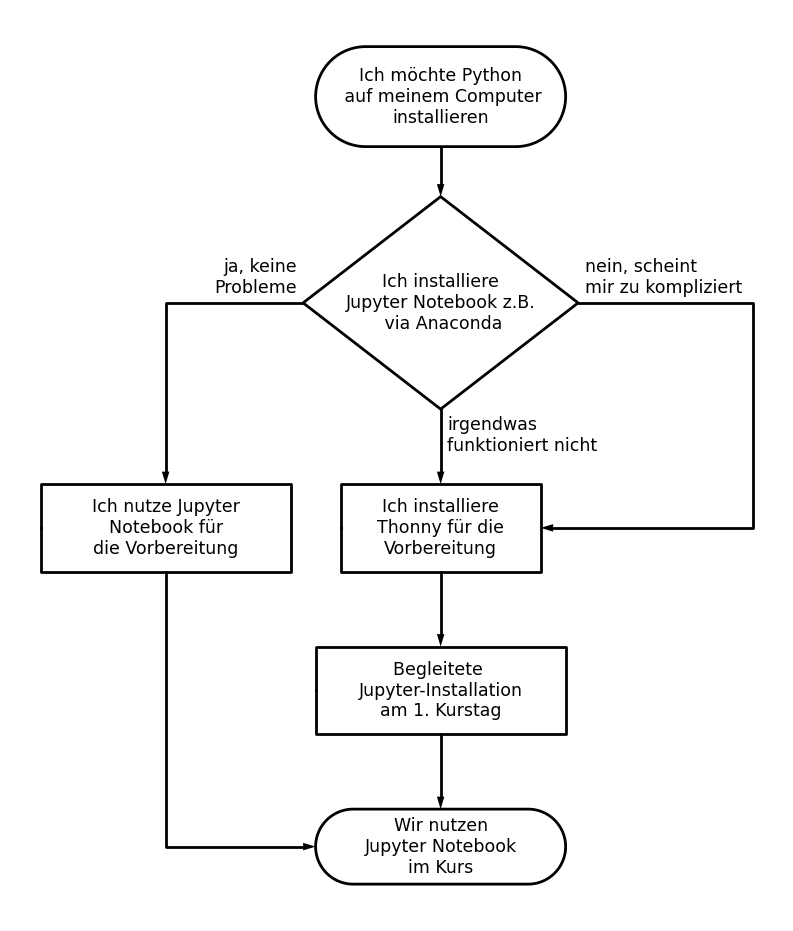

In [4]:
# Hinweis: `:=` ist der Walross-Operator ("walrus operator", Zuweisung und Rückgabewert in einem)

with schemdraw.Drawing() as d:
    d += flow.Start(w=5, h=2).label('Ich möchte Python\n auf meinem Computer\ninstallieren')
    d2 = flow.Arrow().down(d.unit/3)
    d2 = (
        info1 := flow.Box(w=8, h=2.25)
          .label(
              "Im Kurs werden wir Jupyter Notebook\n"
              "nutzen, aber Thonny ist\n"
              "einfacher zu installieren und für\n"
              "die Vorbereitung auch gut geeignet"
          )
    )
    d += flow.Arrow().down(d.unit/3)
    d += (
        install := flow.Decision(
            w=5.5, h=4.25,
            W="ja, keine\nProbleme",
            S='irgendwas\nfunktioniert nicht',
            E="nein, scheint\nmir zu kompliziert"
        ).label("Ich installiere\nJupyter Notebook z.B.\n via Anaconda")
    )
    
    d += flow.Arrow().down(d.unit/2)
    d += (thonny := flow.Box(w=4, h=1.75).label('Ich installiere\nThonny für die\nVorbereitung'))
    
    d += flow.Arrow().down(d.unit/2)
    d += (flow.Box(w=5, h=1.75).label('Begleitete \nJupyter-Installation\nam 1. Kurstag'))
    
    
    d += flow.Arrow().down(d.unit/2)
    d += (
        ende := flow.Terminal(w=5, h=1.5)
        .label("Wir nutzen\nJupyter Notebook\nim Kurs")
    )
    
    d += flow.Wire('c', k=3.5, arrow='->').at(install.E).to(thonny.E)
    
    d += (jnb := flow.Box(w=5, h=1.75)
          .label("Ich nutze Jupyter\nNotebook für\ndie Vorbereitung")
          .at((thonny.N.x - 3, thonny.W.y))
     )
    d += flow.Wire('-|', k=1.5, arrow='->').at(install.W).to(jnb.N)
    d += flow.Wire('|-', k=1.5, arrow='->').at(jnb.S).to(ende.W)
    _ = d.save('installation.svg')

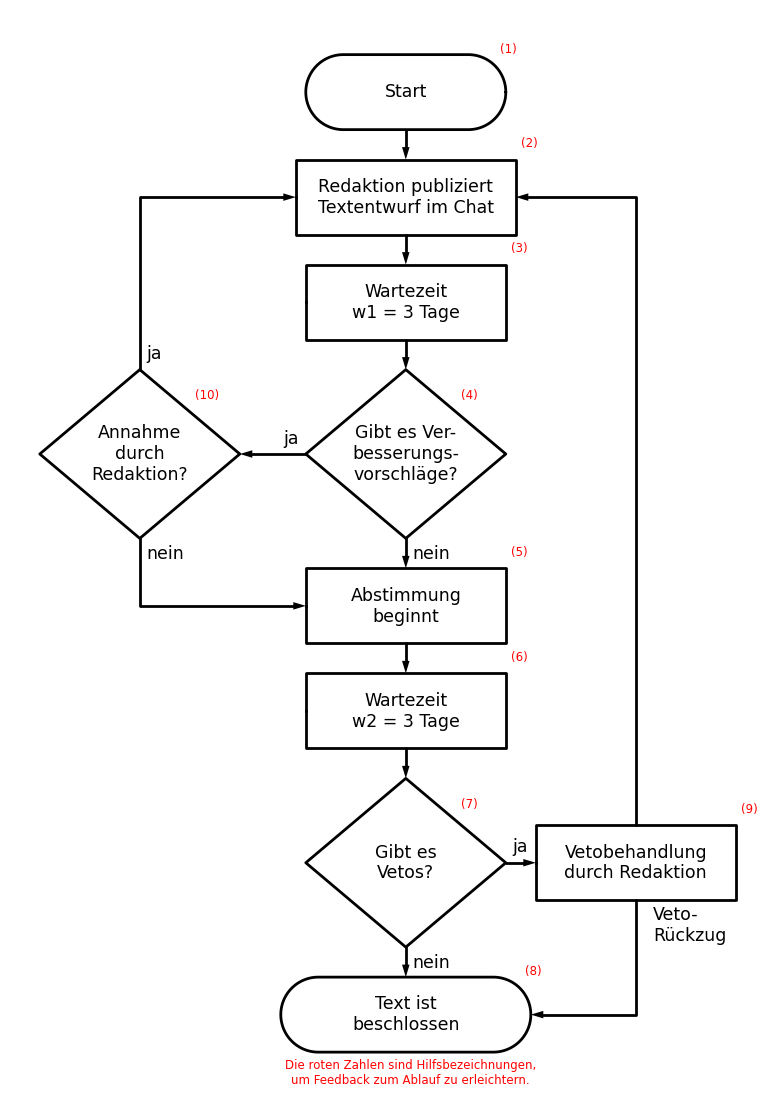

In [118]:
# Hinweis: `:=` ist der Walross-Operator ("walrus operator", Zuweisung und Rückgabewert in einem)

w = 4
h = 1.5

with schemdraw.Drawing() as d:
    dy = d.unit*0.2
    d += flow.Start(w=w, h=h).label("Start")
    d += flow.Arrow().down(dy)
    d += ( box_red_erst := flow.Box(w=w*1.1, h=h).label("Redaktion publiziert\nTextentwurf im Chat"))
    d += flow.Arrow().down(dy)
    d += (flow.Box(w=w, h=h).label("Wartezeit\nw1 = 3 Tage"))
    d += flow.Arrow().down(dy)
    d += (
        dec_vv := flow.Decision(
            w=w, h=h*2.25,
            W="ja",
            S="nein",
        ).label("Gibt es Ver-\nbesserungs-\nvorschläge?")
    )

    d += flow.Arrow().down(dy)
    d += (box_abst := flow.Box(w=w, h=h).label("Abstimmung\nbeginnt"))
    d += flow.Arrow().down(dy)
    d += (flow.Box(w=w, h=h).label("Wartezeit\nw2 = 3 Tage"))
    d += flow.Arrow().down(dy)
    d += (
        dec_vetos := flow.Decision(
            w=w, h=h*2.25,
            E="ja",
            S="nein",
        ).label("Gibt es\nVetos?")
    )

    d += flow.Arrow().down(dy)
    d += (
        ende := flow.Terminal(w=5, h=1.5)
        .label("Text ist\nbeschlossen")
    )

    # Ende vertikaler Hauptast

    d += (box_veto_beh := flow.Box(w=w, h=h)
          .label("Vetobehandlung\ndurch Redaktion")
          .at((dec_vetos.E.x + dy + w/2, dec_vetos.E.y + h/2))
     )
    d += flow.Wire('|-', k=1.5, arrow='->').at(box_veto_beh.N).to(box_red_erst.E)
    d += flow.Wire('-', arrow='->').at(dec_vetos.E).to(box_veto_beh.W)
    d += (
        flow.Wire('|-', k=1.5, arrow='->')
        .at(box_veto_beh.S).to(ende.E).label("Veto-\nRückzug", ofst=(1.4, 1.4), halign="left")
    )
    d += (
        dec_annahme := flow.Decision(
            w=w, h=h*2.25,
            N="ja",
            S="nein",
        ).label("Annahme\ndurch\nRedaktion?").at((dec_vv.E.x - w*1.33, dec_vv.E.y))
    )
    d += flow.Wire('-', arrow='->').at(dec_vv.W).to(dec_annahme.E)
    d += flow.Wire('|-', arrow='->').at(dec_annahme.N).to(box_red_erst.W)
    d += flow.Wire('|-', arrow='->').at(dec_annahme.S).to(box_abst.W)

    # empty Element used for annotation
    ann = schemdraw.elements.Element

    def enumerate_elements(d, color="red"):
        fs = {"fontsize": 10}
        all_elements = list(d.elements)
        txt = "Die roten Zahlen sind Hilfsbezeichnungen,\num Feedback zum Ablauf zu erleichtern."
        d += ann().at(ende.S).label(txt, ofst=(0.0, -0.8), halign="center", **fs).color(color)

        i = 1
        for elt in all_elements:
            if not isinstance(elt, (flow.Box, flow.Decision, flow.Terminal)):
                continue
            d += ann().at(elt.NE).label(f"({i})", halign="left", **fs).color(color)
            i += 1
        return d
    d = enumerate_elements(d)

    _ = d.save("text-beschluss.svg")